키, 몸무게, 뇌 크기 효과를 제거한 상태에서 남녀의 VIQ 차이가 있는지를 검정해 보세요.

#### 가설의 설정
H0 : 남자와 여자의 VIQ 차이는 없다.<br>
H1 : 남자와 여자의 VIQ 차이는 있다.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
import pandas as pd
data =pd.read_csv('/gdrive/My Drive/전산통계/data/brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


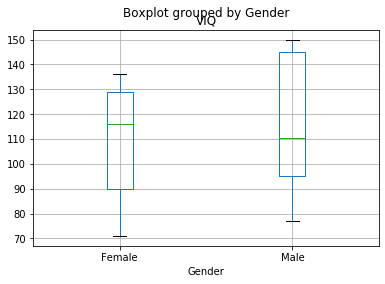

In [3]:
# 먼저 boxplot으로 남녀의 VIQ 차이를 확인해보자
# VIQ의 최댓값과 최솟값은 남자가 더 높지만, 중앙값은 여자가 더 높았다.
# 즉 상위 VIQ를 가지고 있는 몇몇 남자가 존재하지만, 전체적으로 보면 여자가 높은 경향을 보인다고 할 수 있다.

data.boxplot(column=['VIQ'],by='Gender')

In [0]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [5]:
female_viq

0     132
4     132
5      90
6     136
7      90
10    129
13    120
14    100
15     71
16    132
18    112
22    129
24     86
26     90
28     83
29    126
30    126
34     90
35    129
37     86
Name: VIQ, dtype: int64

In [6]:
male_viq

1     150
2     123
3     129
8      93
9     114
11    150
12    129
17     96
19     77
20     83
21    107
23    145
25    145
27     96
31    145
32     96
33     96
36    150
38     90
39     91
Name: VIQ, dtype: int64

In [11]:
# 등분산검정
# 아래 3개의 도구를 통한 등분산검정을 통해 유의수준 1%에서 남자와 여자의 VIQ 분포의 분산은 같다고 할 수 있다.

from scipy import stats

print(stats.bartlett(female_viq, male_viq))
print(stats.fligner(female_viq, male_viq))
print(stats.levene(female_viq, male_viq))

BartlettResult(statistic=0.5214285343261972, pvalue=0.4702329452871379)
FlignerResult(statistic=1.1181435245283073, pvalue=0.29031855255753536)
LeveneResult(statistic=0.7852826699352736, pvalue=0.38110422921600584)


#### 검정통계량의 계산 및 기각역 설정

In [13]:
stats.ttest_ind(female_viq, male_viq, equal_var=True) # 분산이 같으므로 equal_var을 True로 설정

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

#### 결론
위의 결과를 통해 귀무가설을 기각할 수 없다. 즉, 남자와 여자의 VIQ차이는 있다고 할 수 없다.
